### LinearRegression: Ridge and Lasso

### House-Price-Prediction


In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [160]:
csv_file_path = "boston_housing.csv"
dataset = pd.read_csv(csv_file_path)

In [182]:
dataset.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Note : 
- Independent_features (X) :   "crim-zn-indus-chas-nox-rm-age-dis-rad-tax-ptratio-b-lstat-Price"
- Dependent_variable (Y)   :   "0-1-2-3-4-5-6-7-8-9"

In [162]:
dataset.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'Price'],
      dtype='object')

In [163]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [164]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [165]:
##  Extract the independent features (X) using iloc
##  which selects all rows (:) and all columns except the last one (:-1).

x = dataset.iloc[:,:-1]                                         ## independent_features_x

## Extract the dependent variable (y) using iloc
## which selects all rows (:) and only the last column (-1)

y = dataset.iloc[:, -1]                                         ## dependent_variable_y

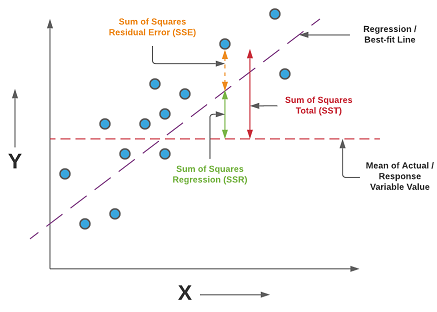

In [166]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [167]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()

## calculates the mean squared error (MSE) for a linear regression model using cross-validation.
## cv=5: In this case, it is set to 5, meaning the dataset will be divided into 5 folds for cross-validation.
mse=cross_val_score(lin_reg ,  x ,  y , scoring='neg_mean_squared_error' , cv=5) 
mean_mse=np.mean(mse)
print(mean_mse)

-37.13180746769923


### Ridge Regression

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

#### Parameters:
- class sklearn.linear_model.Ridge ( ):
    - alpha=1.0
    - fit_intercept=True
    - copy_X=True
    - max_iter=None
    - tol=0.0001
    - solver='auto'
    - positive=False
    - random_state=None

#### Attributes:
- class sklearn.linear_model.Ridge ( ):
    - coef_
    - intercept_
    - n_iter_
    - n_features_in_
    - feature_names_in_  
 
#### Methods :
- class sklearn.linear_model.Ridge ( ):
    - fit(X, y[, sample_weight]) : Fit Ridge regression model.
    - get_params([deep]) : Get parameters for this estimator.
    - predict(X) : Predict using the linear model.
    - score(X, y[, sample_weight]) : Return the coefficient of determination of the prediction.
    - set_params(**params) : Set the parameters of this estimator.

In [169]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()

params = {'alpha' :[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge,params,scoring = "neg_mean_squared_error",cv=10)
ridge_regressor.fit(x , y)


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [170]:
ridge_regressor.best_params_

{'alpha': 100}

In [171]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-29.615220097335133


### Compare two result dataframes :

- For Linear Regression result ==== -37.13180746769923  ( We selected Linear Regression)
    - performance is good .
    
- For Ridge result ================ -29.615220097335133
    - reduce a over-fitting
    - performance is not good .


### Lasso Regression

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

#### Parameters:
- class sklearn.linear_model.Ridge ( ):
    - alpha : float, default=1.0
    - fit_intercept : bool, default=True
    - copy_X : bool, default=True
    - max_iter : int, default=1000
    - tol : float, default=1e-4
    - precompute : bool or array-like of shape (n_features, n_features), default=False
    - positive : bool, default=False
    - selection{‘cyclic’, ‘random’}, default=’cyclic’
    - random_state : int, RandomState instance, default=None
    - warm_start : bool, default=False

#### Attributes:
- class sklearn.linear_model.Ridge ( ):
    - coef_ : ndarray of shape (n_features,) or (n_targets, n_features)
    - dual_gap_ : float or ndarray of shape (n_targets,) 
    - sparse_coef_ : sparse matrix of shape (n_features, 1) or (n_targets, n_features)
    - intercept_ : float or ndarray of shape (n_targets,)
    - n_iter_ : int or list of int
    - n_features_in_ : int
    - feature_names_in_ : ndarray of shape (n_features_in_,)
 
#### Methods :
- class sklearn.linear_model.Ridge ( ):
    - fit(X, y[, sample_weight]) : Fit Ridge regression model.
    - get_params([deep]) : Get parameters for this estimator.
    - predict(X) : Predict using the linear model.
    - score(X, y[, sample_weight]) : Return the coefficient of determination of the prediction.
    - set_params(**params) : Set the parameters of this estimator.
    - path(X, y, *[, l1_ratio, eps, n_alphas, ...]) : Compute elastic net path with coordinate descent.

In [172]:
from sklearn.linear_model import Lasso 
from sklearn.model_selection import GridSearchCV
lasso = Lasso()

params = {'alpha' :[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}   ## For alpha add more data (30,35,40,45,50,55,100)
lasso_regressor = GridSearchCV(lasso,params,scoring = "neg_mean_squared_error",cv=10)
lasso_regressor.fit( x , y )


c:\Users\Farshid Hesami\anaconda3\envs\env1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.100e+03, tolerance: 4.070e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\Farshid Hesami\anaconda3\envs\env1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.635e+03, tolerance: 4.117e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\Farshid Hesami\anaconda3\envs\env1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [173]:
lasso_regressor.best_params_

{'alpha': 0.01}

In [174]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-34.45554381307912


### train_test_split

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

- sklearn.model_selection.train_test_split (*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)


In [183]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


### Compare three result  :

- For Linear Regression result-----> -37.13180746769923  
    
- For Ridge result------------ ----> -29.615220097335133 

- For Lasso result-----------------> -34.45554381307912


### train_test_split:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [203]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [204]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
lin_reg.fit(x_train , y_train )   
mse=cross_val_score(lin_reg , x_train , y_train , scoring='neg_mean_squared_error' , cv=5) 
mean_mse=np.mean(mse)
print(mean_mse)

-25.18787473928514


In [205]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()

params = {'alpha' :[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge,params,scoring = "neg_mean_squared_error",cv=10)
ridge_regressor.fit(x_train , y_train)


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [206]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-25.472067363367742


In [207]:
from sklearn.linear_model import Lasso 
from sklearn.model_selection import GridSearchCV
lasso = Lasso()

params = {'alpha' :[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}   ## For alpha add more data (30,35,40,45,50,55,100)
lasso_regressor = GridSearchCV(lasso,params,scoring = "neg_mean_squared_error",cv=10)
lasso_regressor.fit(x_train , y_train)

c:\Users\Farshid Hesami\anaconda3\envs\env1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.382e+03, tolerance: 2.712e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\Farshid Hesami\anaconda3\envs\env1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.879e+03, tolerance: 2.557e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\Farshid Hesami\anaconda3\envs\env1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [208]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-25.473094572833244


### Compare after train_test_split  :

- train_test_split-----------------> -25.18787473928514 ------>(The performance is better than other result because going to ZERO (0))
    
- For Ridge result------------ ----> -25.472067363367742

- For Lasso result-----------------> -25.473094572833244

In [209]:
lasso_regressor.predict(x_test)

array([28.53469457, 36.61870038, 15.63751051, 25.50144953, 18.70967356,
       23.16471553, 17.31011033, 14.0773636 , 23.01064349, 20.5422349 ,
       24.91632311, 18.41098048, -6.52079694, 21.83372577, 19.14903066,
       26.05873213, 20.30232607,  5.74943563, 40.33137805, 17.4579146 ,
       27.47486675, 30.21707564, 10.80555628, 23.8772175 , 17.99492226,
       16.02608761, 23.26828778, 14.36825218, 22.38116931, 19.30920694,
       22.17284558, 25.05925451, 25.13780726, 18.46730239, 16.60405678,
       17.46564111, 30.71367735, 20.05106816, 23.98977653, 24.94322399,
       13.97945361, 31.64706961, 42.48057194, 17.70042803, 26.92507866,
       17.15897728, 13.68918092, 26.14924236, 20.27823036, 29.99003508,
       21.21260346, 34.03649177, 15.41837559, 25.95781066, 39.13897287,
       22.9611842 , 18.8031058 , 33.07865363, 24.74384153, 12.83640948,
       22.41963416, 30.64804998, 31.5956712 , 16.34088222, 20.95043064,
       16.70145827, 20.23215651, 26.1437865 , 31.12160899, 11.89

### sklearn.metrics.r2_score

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

- - sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)

#### Parameters:
- class sklearn.metrics.r2_score:
    - y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
    - y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
    - sample_weight : array-like of shape (n_samples,), default=None
    - multioutput : {‘raw_values’, ‘uniform_average’, ‘variance_weighted’}, array-like of shape (n_outputs,) 
    - raw_values :
    - uniform_average :
    - variance_weighted :
    - force_finitebool, default=True

#### Returns:
- class sklearn.metrics.r2_score:
    - z : float or ndarray of floats

### Lasso :

In [210]:
y_pred = lasso_regressor.predict(x_test)
from sklearn.metrics import r2_score


r2_score1=r2_score(y_pred, y_test)
r2_score_percentage = r2_score1 * 100

In [218]:
print("R-squared score: {:.2f}%".format(r2_score_percentage))

R-squared score: 67.10%


### Ridge :

In [199]:
y_pred = ridge_regressor.predict(x_test)
from sklearn.metrics import r2_score


r2_score1=r2_score(y_pred, y_test)
r2_score_percentage = r2_score1 * 100

In [217]:
print("R-squared score: {:.2f}%".format(r2_score_percentage))

R-squared score: 67.10%


### Liner Regression :

In [215]:
y_pred = lin_reg.predict(x_test)
from sklearn.metrics import r2_score


r2_score1=r2_score(y_pred, y_test)
r2_score_percentage = r2_score1 * 100

In [216]:
print("R-squared score: {:.2f}%".format(r2_score_percentage))

R-squared score: 67.10%


### Compare after sklearn.metrics.r2_score :

- For linear regression result-----------------> 0.6709558976744432

- For Ridge result ----------------------------> 0.6708743257533069

- For Lasso result ----------------------------> 0.6709558959121945